## `INNOMATICS RESEARCH LABS Hackathon ------------------------------`

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
data = pd.read_csv('data hackathon.csv')
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [97]:
data.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [98]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [99]:
data.dropna(axis = 0,how='any',inplace=True)  # delete row which contain null values

In [100]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [101]:
data.shape

(2219, 3)

In [102]:
data.skew()

x1     0.071848
x2    33.287853
y      0.233363
dtype: float64

In [103]:
data.kurt()

x1      -1.264961
x2    1107.106508
y       -1.947298
dtype: float64

### `univariate analysis`

### x1

<AxesSubplot:xlabel='x1', ylabel='Density'>

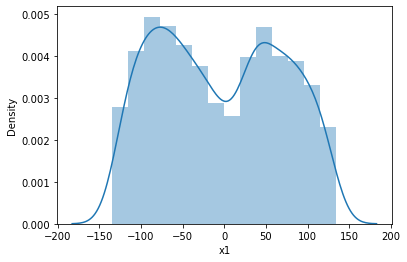

In [104]:
sns.distplot(data['x1'])

<AxesSubplot:xlabel='x1'>

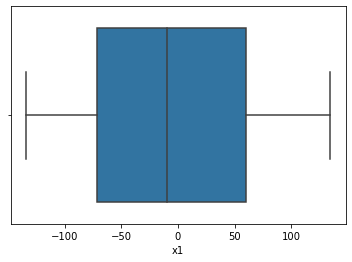

In [105]:
sns.boxplot(data['x1'])

In [106]:
data['x1'].describe()

count    2219.000000
mean       -4.771837
std        74.938264
min      -134.369160
25%       -71.581453
50%        -9.750840
75%        59.963056
max       134.508687
Name: x1, dtype: float64

In [107]:
data['x1'].skew()

0.07184836241273518

In [108]:
q1=np.percentile(data['x1'],25)
q3=np.percentile(data['x1'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound = {lower_bound} and Upper Bound = {upper_bound}')

Lower Bound = -268.898215945 and Upper Bound = 257.279819455


In [109]:
data = data[data['x1'] <= upper_bound]   # remove outliers

### x2

<AxesSubplot:xlabel='x2', ylabel='Density'>

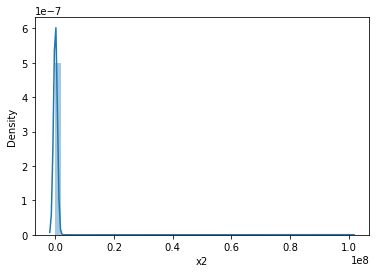

In [110]:
sns.distplot(data['x2'])

<AxesSubplot:xlabel='x2'>

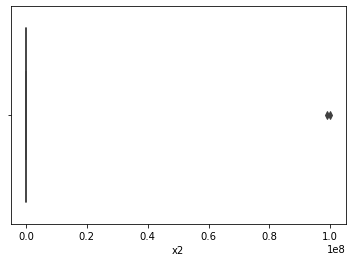

In [111]:
sns.boxplot(data['x2'])

In [112]:
q1=np.percentile(data['x2'],25)
q3=np.percentile(data['x2'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound = {lower_bound} and Upper Bound = {upper_bound}')

Lower Bound = -296.5058689975 and Upper Bound = 280.1506946225


In [113]:
data = data[data['x2'] <= upper_bound]   # remove outliers

In [114]:
data['x2'].describe()

count    2217.000000
mean       -6.730568
std        79.843938
min      -134.876132
25%       -80.519315
50%        -1.827336
75%        63.622498
max       134.929748
Name: x2, dtype: float64

In [115]:
data['x2'].skew()

-0.006862610670415014

<AxesSubplot:xlabel='x2', ylabel='Density'>

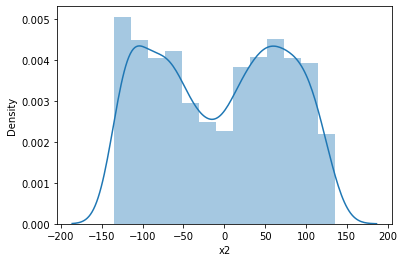

In [116]:
sns.distplot(data['x2'])

### y

In [117]:
data['y'].value_counts()

0    1236
1     981
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

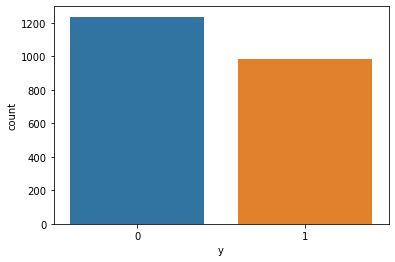

In [118]:
sns.countplot(data['y'])

### `Bivariate analysis`

In [119]:
cont_columns = ['x1','x2']

In [120]:
from scipy.stats import ttest_ind

for i in cont_columns:
    target_yes = data.loc[data['y']==1,i]
    target_no = data.loc[data['y']==0,i]
    ttest_results = ttest_ind(target_yes,target_no)
    print(f'{i} vs y => {ttest_results}')

x1 vs y => Ttest_indResult(statistic=-5.689023533827039, pvalue=1.4467150236235103e-08)
x2 vs y => Ttest_indResult(statistic=2.9795758837968047, pvalue=0.002917864796008186)


In [121]:
X = data[['x1','x2']]
y = data['y']

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[['x1','x2']])

StandardScaler()

In [124]:
X_train[['x1', 'x2']] = sc.transform(X_train[['x1','x2']])
X_test[['x1','x2']] = sc.transform(X_test[['x1','x2']])

## `Logistic Regression ---------------`

In [125]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [126]:
y_pred = model.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[239   1]
 [125  79]]
Accuracy => 0.7162162162162162
Precision => 0.9875
Recall => 0.3872549019607843
f1-score => 0.5563380281690141


<br />
<br />
<br />
<br />

---------

## `Decision Tree ---------------------`

In [128]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [129]:
y_pred = tree.predict(X_test)

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[213  27]
 [ 22 182]]
Accuracy => 0.8896396396396397
Precision => 0.8708133971291866
Recall => 0.8921568627450981
f1-score => 0.8813559322033899


#### `Grid Search --------------------------------------------------`

In [131]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[2,4,5,6,7,8,14,15]
}

tree = DecisionTreeClassifier()

In [132]:
tree_grid = GridSearchCV(tree,param_grid,n_jobs=-1,scoring='precision',cv=10)

In [133]:
tree_grid.fit(X_train,y_train.astype(int))

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 5, 6, 7, 8, 14, 15]},
             scoring='precision')

In [134]:
tree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [135]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree = DecisionTreeClassifier(criterion='gini',max_depth=2)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [136]:
y_pred = tree.predict(X_test)

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[150  90]
 [ 27 177]]
Accuracy => 0.7364864864864865
Precision => 0.6629213483146067
Recall => 0.8676470588235294
f1-score => 0.7515923566878979


<br />
<br />
<br />
<br />

---------



## `KNN -------------------------------`

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[220  20]
 [ 10 194]]
Accuracy => 0.9324324324324325
Precision => 0.9065420560747663
Recall => 0.9509803921568627
f1-score => 0.9282296650717703


#### `Grid Search --------------------------------------`

In [140]:
parameters = {
    "n_neighbors": list(range(3,17,2)),
    "p":[1,2]
}

In [141]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid = GridSearchCV(knn,parameters,n_jobs=-1,scoring="precision",cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2]},
             scoring='precision')

In [142]:
grid.best_params_

{'n_neighbors': 13, 'p': 1}

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13,p=1)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[224  16]
 [  7 197]]
Accuracy => 0.9481981981981982
Precision => 0.9248826291079812
Recall => 0.9656862745098039
f1-score => 0.9448441247002399


<br />
<br />
<br />
<br />

---------

## `SVM with Linear Kernel => SVC -------------------------------`

In [145]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[240   0]
 [126  78]]
Accuracy => 0.7162162162162162
Precision => 1.0
Recall => 0.38235294117647056
f1-score => 0.5531914893617021


#### `Grid Search -------------------------------------------------`

In [147]:
parameters = {
    "gamma": ['scale','auto'],
    "C":[1.0,2.0]
}

In [148]:
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel='linear')
grid = GridSearchCV(svc,parameters,n_jobs=-1,scoring="accuracy",cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [1.0, 2.0], 'gamma': ['scale', 'auto']},
             scoring='accuracy')

In [149]:
y_pred = grid.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[240   0]
 [126  78]]
Accuracy => 0.7162162162162162
Precision => 1.0
Recall => 0.38235294117647056
f1-score => 0.5531914893617021


<br />
<br />
<br />
<br />

---------

## `SVM with RBF Kernel => SVC -------------------------------`

In [151]:
from sklearn.svm import SVC
svc = SVC(C=1.0, kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[219  21]
 [  6 198]]
Accuracy => 0.9391891891891891
Precision => 0.9041095890410958
Recall => 0.9705882352941176
f1-score => 0.9361702127659575


#### `Grid Search`

In [153]:
parameters = {
    "gamma": ['scale','auto'],
    "C":[1.0,2.0]
}

In [154]:
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc,parameters,n_jobs=-1,scoring="accuracy",cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.0, 2.0], 'gamma': ['scale', 'auto']},
             scoring='accuracy')

In [155]:
y_pred = grid.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
print(f'Confusion matrix =>\n {confusion_matrix(y_test,y_pred)}')
print(f'Accuracy => {accuracy_score(y_test,y_pred)}')
print(f'Precision => {precision_score(y_test,y_pred)}')
print(f'Recall => {recall_score(y_test,y_pred)}')
print(f'f1-score => {f1_score(y_test,y_pred)}')

Confusion matrix =>
 [[218  22]
 [  6 198]]
Accuracy => 0.9369369369369369
Precision => 0.9
Recall => 0.9705882352941176
f1-score => 0.9339622641509434


<br />
<br />
<br />
<br />
<br />

--------------

## `Observations ----------------------------------------------`
##### Here in this hackathon I have tested 5 models :
    Logistic Regression
    Decision Tree
    KNN
    SVM with Linear Kernel
    SVM with RBF Kernel
    
    
##### Below are their accuracies and best parameters :
    Logistic Regression
        Accuracy => 0.7162162162162162
        Precision => 0.9875
        Recall => 0.3872549019607843
        f1-score => 0.5563380281690141
    Decision Tree
        Accuracy => 0.8896396396396397
        Precision => 0.8708133971291866
        Recall => 0.8921568627450981
        f1-score => 0.8813559322033899
    KNN
        Accuracy => 0.9481981981981982
        Precision => 0.9248826291079812
        Recall => 0.9656862745098039
        f1-score => 0.9448441247002399
    SVM with Linear Kernel
        Accuracy => 0.7162162162162162
        Precision => 1.0
        Recall => 0.38235294117647056
        f1-score => 0.5531914893617021
    SVM with RBF Kernel
        Accuracy => 0.9369369369369369
        Precision => 0.9
        Recall => 0.9705882352941176
        f1-score => 0.9339622641509434
        
#### Through modelling of all 5 models I get the outcome that:
`SVM with RBF Kernel has given the highest accuracy of 94.81`